# Exploratory data analysis of Wind spacecraft magnetic field time series

In [1]:
import numpy as np
import pandas as pd
import cdflib
import math as m
import seaborn as sns
from scipy import signal
from matplotlib import pyplot as plt
from statsmodels.graphics import tsaplots
from data_import_funcs import read_cdfs, date_1d_dict, read_asc_ts, extract_components
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [80]:
cdf_file = cdflib.CDF("data\Wind\h2\wi_h2_mfi_20151101_v05.cdf")

In [82]:
print(cdf_file.globalattsget(expand = False))

{'Project': 'ISTP>International Solar-Terrestrial Physics', 'Discipline': 'Space Physics>Heliospheric Science', 'Source_name': 'WIND>Wind Interplanetary Plasma Laboratory', 'Software_version': 'V05.00', 'Data_type': 'H2>High-resolution Definitive Data', 'Descriptor': 'MFI>Magnetic Fields Investigation', 'Data_version': '05', 'TITLE': 'WIND Magnetic Field Investigation (MFI) High-Resolution Production', 'TEXT': ['WIND MFI high-resolution data file. Time resolution varies with instrument mode.', 'Modes 0 & 10, low rate: .184s, high rate: .092s                                 ', 'Modes 1 & 11, low rate: Prim .092s Sec 1.84s, high rate: Prim .046s Sec .92s    ', 'Modes 2 & 12, Same as Modes 1 & 11                                              ', 'Calibration constants are 1 minute averages.                                    ', 'WIND MFI Instrument turn on 11/12/1994                                          ', 'Data versions:                                                                  

In [83]:
print(cdf_file.cdf_info()['zVariables']) 

['Epoch', 'Time_PB5', 'BF1', 'BGSM', 'BGSE', 'RANGE', 'SPC_MODE', 'MAG_MODE', 'Epoch1', 'Time1_PB5', 'NUM1_PTS_O', 'ZERO1_O', 'SENS1_O', 'AMPL1_O', 'ORTH1_O', 'PAYLD1_O', 'FLAG1_O', 'NUM1_PTS_I', 'ZERO1_I', 'SENS1_I', 'AMPL1_I', 'ORTH1_I', 'PAYLD1_I', 'FLAG1_I', 'label_time', 'format_time', 'unit_time', 'label_bgsm', 'label_bgse', 'cartesian']


In [84]:
print(cdf_file.varinq('BF1'))

{'Variable': 'BF1', 'Num': 2, 'Var_Type': 'zVariable', 'Data_Type': 21, 'Data_Type_Description': 'CDF_REAL4', 'Num_Elements': 1, 'Num_Dims': 0, 'Dim_Sizes': [], 'Sparse': 'No_sparse', 'Last_Rec': 898797, 'Rec_Vary': True, 'Dim_Vary': [], 'Pad': array([1.e-45], dtype=float32), 'Compress': 0, 'Block_Factor': 0}


In [75]:
print(cdf_file.varattsget('BF1'))

{'FIELDNAM': 'Magnetic field magnitude', 'VALIDMIN': array([0.], dtype=float32), 'VALIDMAX': array([65534.], dtype=float32), 'SCALEMIN': array([0.18603748], dtype=float32), 'SCALEMAX': array([9.2336035], dtype=float32), 'UNITS': 'nT', 'LABLAXIS': 'B', 'FORMAT': 'E13.6', 'MONOTON': 'FALSE', 'SCALETYP': 'LINEAR', 'CATDESC': 'Magnetic field magnitude', 'FILLVAL': array([-1.e+31], dtype=float32), 'DEPEND_0': 'Epoch', 'VAR_TYPE': 'data', 'TIME_RES': 'Variable', 'VAR_NOTES': 'B field Magnitude'}


In [76]:
print(cdf_file.varattsget('Epoch'))

{'FIELDNAM': 'Time Line', 'VALIDMIN': array([6.29518176e+13]), 'VALIDMAX': array([6.40921248e+13]), 'SCALEMIN': array([6.36135552e+13]), 'SCALEMAX': array([6.36136416e+13]), 'UNITS': 'ms', 'LABLAXIS': 'Epoch', 'FORMAT': 'E14.8', 'MONOTON': 'INCREASE', 'SCALETYP': 'LINEAR', 'CATDESC': 'Time, Centered, Number of milliseconds since the epoch', 'FILLVAL': array([-1.e+31]), 'VAR_TYPE': 'support_data', 'TIME_RES': 'Variable'}


In [96]:
wind_data = read_cdfs(["data\Wind\h2\wi_h2_mfi_20151101_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151102_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151103_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151104_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151105_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151106_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151107_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151108_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151109_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151110_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151111_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151112_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151113_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151114_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151115_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151116_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151117_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151118_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151119_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151120_v05.cdf",
                       "data\Wind\h2\wi_h2_mfi_20151121_v05.cdf",],
                        {'Epoch':(0), 'BF1':(0)})

reading file  data\Wind\h2\wi_h2_mfi_20151101_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151102_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151103_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151104_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151105_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151106_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151107_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151108_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151109_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151110_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151111_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151112_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151113_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151114_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151115_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151116_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151117_v05.cdf
reading file  data\Wind\h2\wi_h2_mfi_20151118_v05.cdf
reading file  data\Wind\h2\w

In [97]:
wind_data_final = date_1d_dict(wind_data, '5S') #Resampling with freq means we do not get lines drawn between missing data points on line plots, however it does require some averaging which puts the time points slightly off

Here is a snippet of the raw data (before re-sampling according to freq)
                              BF1
Time                             
2015-11-01 00:00:00.019  8.069513
2015-11-01 00:00:00.111  8.083102
2015-11-01 00:00:00.203  8.088889
2015-11-01 00:00:00.295  8.086561
2015-11-01 00:00:00.387  8.108047


In [98]:
print(wind_data_final.head())
print(wind_data_final.notnull().sum())
print(wind_data_final.isnull().sum())

                          BF1
Time                         
2015-11-01 00:00:00  8.087409
2015-11-01 00:00:05  8.124327
2015-11-01 00:00:10  8.081263
2015-11-01 00:00:15  8.047681
2015-11-01 00:00:20  8.036258
BF1    340911
dtype: int64
BF1    21969
dtype: int64


array([<AxesSubplot:xlabel='Time'>], dtype=object)

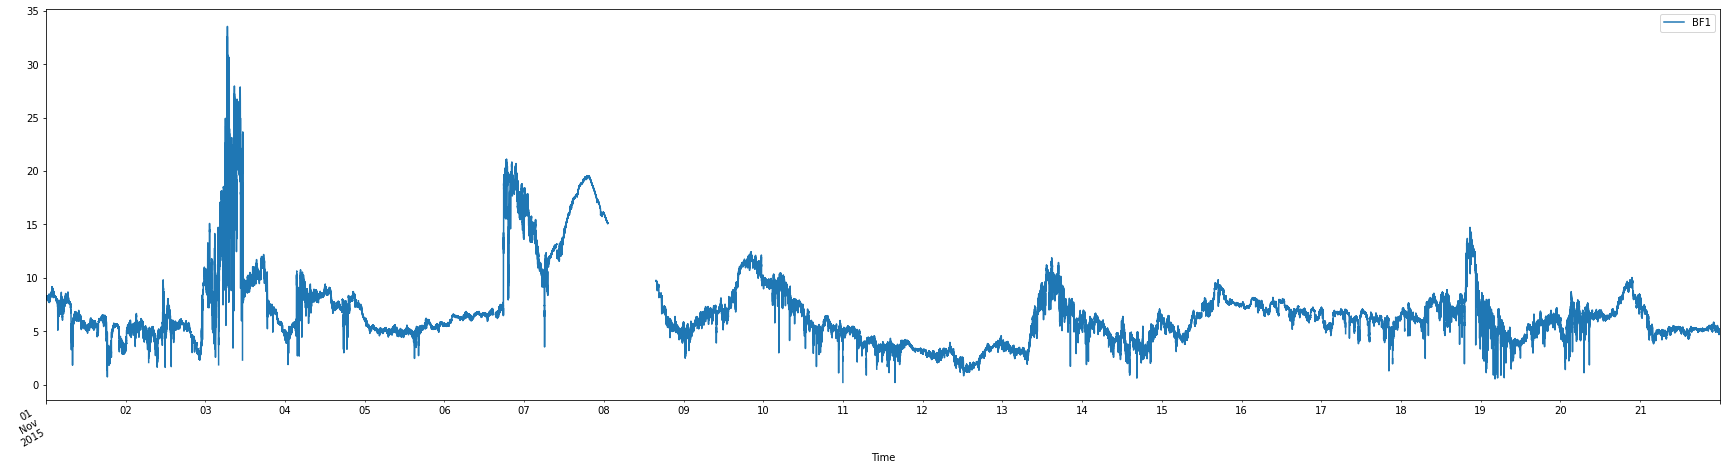

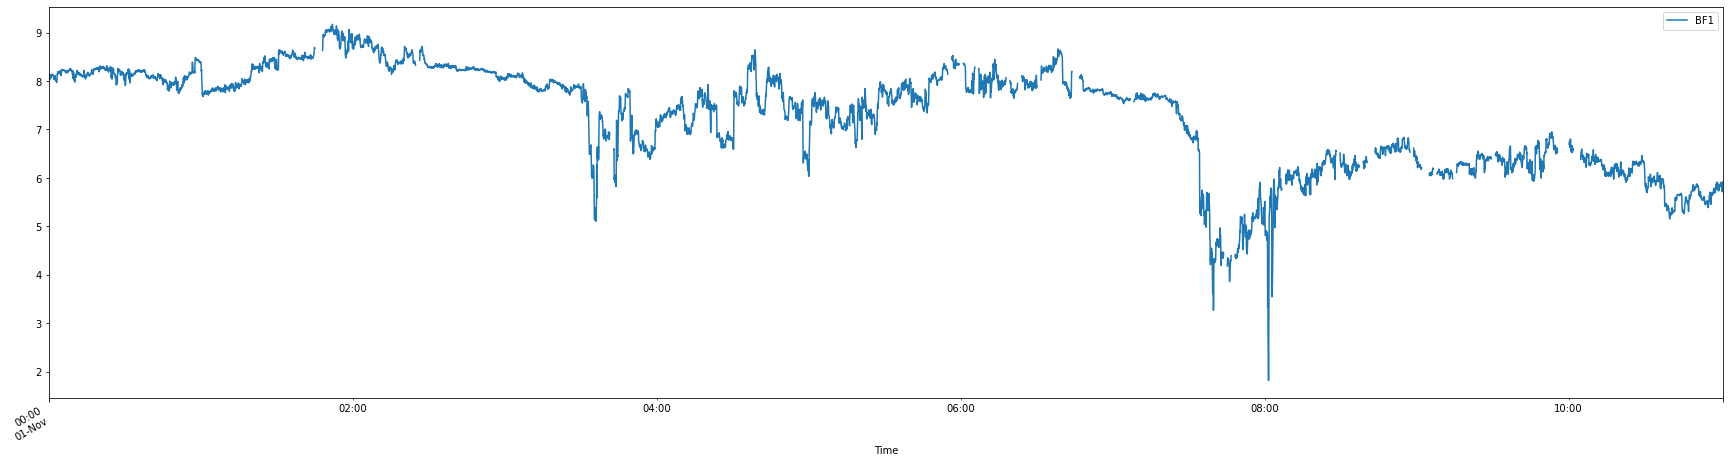

In [103]:
wind_data_final.plot(subplots = True, figsize=(30, 8))
wind_data_final['2015-11-01 00:00':'2015-11-01 11:00'].plot(subplots = True, figsize=(30, 8))


In [ ]:
a = psp_data.values  # Extract out relevant column from dataframe as array
m = np.concatenate(( [True], np.isnan(a), [True] ))  # Mask
ss = np.flatnonzero(m[1:] != m[:-1]).reshape(-1,2)   # Start-stop limits
start,stop = ss[(ss[:,1] - ss[:,0]).argmax()]  # Get max interval, interval limits
print(psp_data[[start]])
print(psp_data[[stop-1]])
starttime = psp_data[[start]].index[0]
endtime = psp_data[[stop-1]].index[0]

In [47]:

wind_data_raw = read_cdfs([
#    "data/wi_h0_mfi_20151114_v05.cdf",
    "data/wi_h0_mfi_20151115_v05.cdf",
    "data/wi_h0_mfi_20151106_v05.cdf",
    "data/wi_h0_mfi_20151107_v05.cdf",
    "data/wi_h0_mfi_20151108_v05.cdf",  
    "data/wi_h0_mfi_20151109_v05.cdf",  
    "data/wi_h0_mfi_20151110_v05.cdf",
    "data/wi_h0_mfi_20151111_v05.cdf",
    "data/wi_h0_mfi_20151112_v05.cdf",
    "data/wi_h0_mfi_20151113_v05.cdf",
    "data/wi_h0_mfi_20151114_v05.cdf",
    "data/wi_h0_mfi_20151115_v05.cdf",
    "data/wi_h0_mfi_20151116_v05.cdf",
    "data/wi_h0_mfi_20151117_v05.cdf",
    "data/wi_h0_mfi_20151118_v05.cdf",
    "data/wi_h0_mfi_20151119_v05.cdf",
    "data/wi_h0_mfi_20151120_v05.cdf",
    "data/wi_h0_mfi_20151121_v05.cdf",
    "data/wi_h0_mfi_20151122_v05.cdf",
    "data/wi_h0_mfi_20151123_v05.cdf",
    "data/wi_h0_mfi_20151124_v05.cdf",
    "data/wi_h0_mfi_20151125_v05.cdf",
    "data/wi_h0_mfi_20151126_v05.cdf",
    "data/wi_h0_mfi_20151127_v05.cdf",
    "data/wi_h0_mfi_20151128_v05.cdf",
    "data/wi_h0_mfi_20151129_v05.cdf"
    ], {'Epoch3':(0), 'B3F1':(0)})

reading file  data/wi_h0_mfi_20151105_v05.cdf


ValueError: Variable name 'Epoch3' not found.

In [9]:
df = pd.DataFrame(wind_data_final)

,BF1
Time,
2015-11-04 00:00:00,4.796618
2015-11-04 00:00:05,4.745318
2015-11-04 00:00:10,4.522998
2015-11-04 00:00:15,4.638089
2015-11-04 00:00:20,4.641773


In [10]:
print(wind_data_final.head())
print(wind_data_final.isna().sum()/len(wind_data_final))
print(wind_data_final.notnull().sum())

                          BF1
Time                         
2015-11-04 00:00:00  4.796618
2015-11-04 00:00:05  4.745318
2015-11-04 00:00:10  4.522998
2015-11-04 00:00:15  4.638089
2015-11-04 00:00:20  4.641773
BF1    0.03206
dtype: float64
BF1    66904
dtype: int64


In [106]:
a = wind_data_final['BF1'].values  # Extract out relevant column from dataframe as array
m = np.concatenate(( [True], np.isnan(a), [True] ))  # Mask
ss = np.flatnonzero(m[1:] != m[:-1]).reshape(-1,2)   # Start-stop limits
start,stop = ss[(ss[:,1] - ss[:,0]).argmax()]  # Get max interval, interval limits
print(wind_data_final['BF1'][[start]])
print(wind_data_final['BF1'][[stop-1]])
starttime = wind_data['BF1'][[start]]
endtime = wind_data['BF1'][[stop-1]]

Time
2015-11-05 10:27:00    5.068003
Freq: 5S, Name: BF1, dtype: float64
Time
2015-11-05 20:46:25    5.337798
Freq: 5S, Name: BF1, dtype: float64


In [109]:
clean = wind_data_final['2015-11-05 10:27:00':'2015-11-05 20:46:25']
print(clean['BF1'].isna().sum())
print(len(clean))

0
7434


121


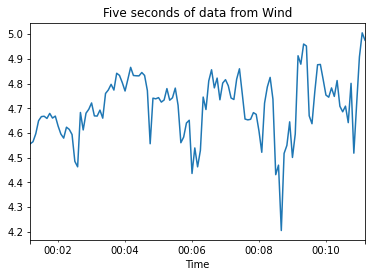

In [108]:
subset = wind_data_final.BF1['2015-11-04 00:01:10':'2015-11-04 00:11:10']
subset.plot(title = "Five seconds of data from Wind")
print(len(subset))